In [8]:
import numpy as np
import pandas as pd
import os 
import sys
sys.path.append(os.path.abspath('../common')) # add path to common functions

In [3]:
train_feat = np.load("../datasets/train/train_feature.npz", allow_pickle=True)
valid_feat = np.load("../datasets/valid/valid_feature.npz", allow_pickle=True)
x_train = train_feat['features']
y_train = train_feat['label']
x_valid = valid_feat['features']
y_valid = valid_feat['label']

test_feat_X = np.load("../datasets/test/test_feature.npz", allow_pickle=True)['features']

In [5]:
x_valid.shape

(489, 13, 768)

# MODELS

In [6]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_valid = x_valid.reshape(x_valid.shape[0], -1)

In [9]:
from models import predict_random_forest, predict_xgboost, predict_mlp, predict_logistic_regression, predict_svc
from evaluate import evaluate_predictions

==========Random Forest==========
              precision    recall  f1-score   support

     Class 0       0.98      0.98      0.98       252
     Class 1       0.98      0.98      0.98       237

    accuracy                           0.98       489
   macro avg       0.98      0.98      0.98       489
weighted avg       0.98      0.98      0.98       489

Accuracy is 0.9815950920245399
==========Random Forest==========


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:49:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


==========XGBoost==========
              precision    recall  f1-score   support

     Class 0       0.98      0.98      0.98       252
     Class 1       0.98      0.98      0.98       237

    accuracy                           0.98       489
   macro avg       0.98      0.98      0.98       489
weighted avg       0.98      0.98      0.98       489

Accuracy is 0.983640081799591
==========XGBoost==========
==========Logistic Regression==========
              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.99       252
     Class 1       0.99      0.98      0.99       237

    accuracy                           0.99       489
   macro avg       0.99      0.99      0.99       489
weighted avg       0.99      0.99      0.99       489

Accuracy is 0.9856850715746421
==========Logistic Regression==========
==========MLP==========
              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.98       252
     Class 1    

/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


==========SVC==========
              precision    recall  f1-score   support

     Class 0       1.00      0.96      0.98       252
     Class 1       0.96      1.00      0.98       237

    accuracy                           0.98       489
   macro avg       0.98      0.98      0.98       489
weighted avg       0.98      0.98      0.98       489

Accuracy is 0.9795501022494888
==========SVC==========


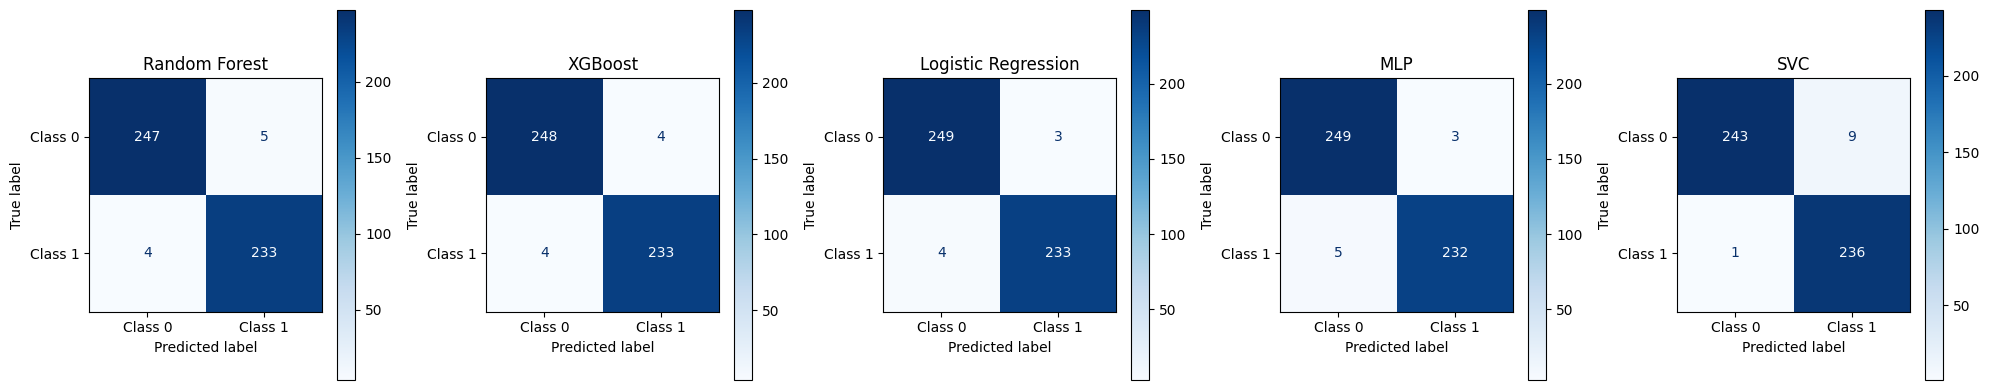

In [10]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # 1 row, 5 columns grid

y_pred_rf = predict_random_forest(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_rf, 'Random Forest', ax=axes[0])

y_pred_xgb = predict_xgboost(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_xgb, 'XGBoost', ax=axes[1])

y_pred_lr = predict_logistic_regression(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_lr, 'Logistic Regression', ax=axes[2])

y_pred_mlp = predict_mlp(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_mlp, 'MLP', ax = axes[3])

y_pred_svc = predict_svc(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_svc, 'SVC', ax = axes[4])

plt.tight_layout()
plt.show()

TODO: run a loop for testing accuracy at 20, 40, 60, 80, 100% of the dataset.